In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 10

<h3>Create dataframes for train and test datasets</h3>

In [2]:
train_df=pd.read_csv('C:\\Users\\aitma\\Downloads\\digit-recognizer\\train.csv')
test_df=pd.read_csv('C:\\Users\\aitma\\Downloads\\digit-recognizer\\test.csv')

In [5]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3>Cleaning Data </h3>

In [6]:
train_df.isna().any().sum()

0

In [7]:
test_df.isna().any().sum()

0

- convert the dataframes into numpy arrays of float32 type

In [8]:
train_data = np.array(train_df, dtype = 'float32')

In [9]:
test_data = np.array(test_df, dtype='float32')

2 :
- x_train , x_test contain all the rows and all columns except the label column and excluding header info .
- y_train , y_test contains all the rows and first column and excluding header info .

In [10]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,:]/255



- split the training data into validation and actual training data for training the model and testing it

In [11]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

- let us visualise the some samples after the resize of the data which needs to be ready for train the network 

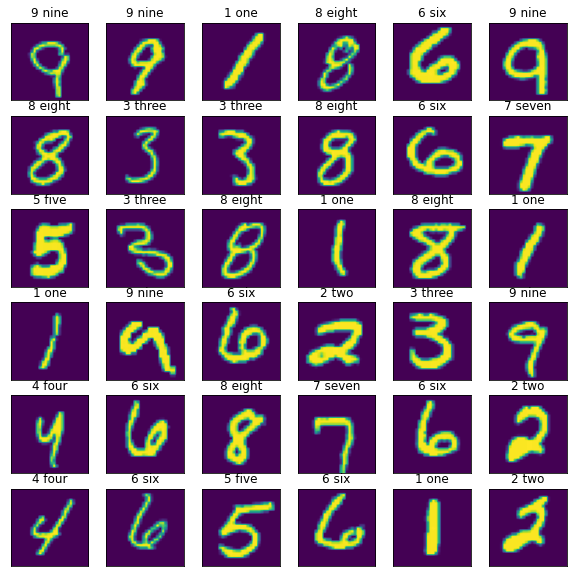

In [12]:
class_names = ['0 zero', '1 one', '2 two', '3 three', '4 four', 
               '5 five', '6 six', '7 seven', '8 eight', '9 nine']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

<h3>Create the Convolutional Neural Networks (CNN)</h3>

-  let us define the shape of the image before we define the model
-  Defined the shape of the image as 3d with rows and columns and 1 for the 3d visualisation

In [13]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)
image_shape

(28, 28, 1)

- formating on the x_train,x_test and x_validate sets.

In [14]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

<h5>Define the model</h5>

The first layer in model network, keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). 

These are densely connected, or fully connected, neural layers. The first Dense layer has 32 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1.

Each node contains a score that indicates the probability that the current image represents one of 10 digits( 0,1,2,3,4,5,6,7,8,9).

In [15]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

<h5>Compile the model </h5>

- Loss function —This measures how accurate the model is during training.  to minimize this function to make the   model in the right direction. we will use "sparse_categorical_crossentropy"


- for the optimizer that allows us to minimze the loss between the prdictions and the truth, we use adam algorithm with a rate of 0.001

- Metrics — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [16]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


<h5> Train Model </h5>

- The model learns to associate images and labels.

- You ask the model to make predictions about a test set—in this example, the x_test array. Verify that the predictions match the labels from the y_test array.

 - batch_size: it is a number of samples processed before the model is updated

- epochs: it is the number of complete passes through training dataset

In [17]:
    
    history=cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=10,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/10
9/9 [==============================] - 22s 2s/step - loss: 2.0414 - accuracy: 0.3375 - val_loss: 1.5948 - val_accuracy: 0.6711
Epoch 2/10
9/9 [==============================] - 15s 2s/step - loss: 1.3060 - accuracy: 0.7343 - val_loss: 0.9046 - val_accuracy: 0.8037
Epoch 3/10
9/9 [==============================] - 21s 2s/step - loss: 0.7377 - accuracy: 0.8253 - val_loss: 0.5493 - val_accuracy: 0.8467
Epoch 4/10
9/9 [==============================] - 17s 2s/step - loss: 0.4892 - accuracy: 0.8622 - val_loss: 0.4173 - val_accuracy: 0.8764
Epoch 5/10
9/9 [==============================] - 17s 2s/step - loss: 0.3915 - accuracy: 0.8859 - val_loss: 0.3537 - val_accuracy: 0.8936
Epoch 6/10
9/9 [==============================] - 15s 2s/step - loss: 0.3382 - accuracy: 0.8997 - val_loss: 0.3146 - val_accuracy: 0.9060
Epoch 7/10
9/9 [==============================] - 13s 1s/step - loss: 0.3034 - accuracy: 0.9106 - val_loss: 0.2865 - val_accuracy: 0.9179
Epoch 8/10
9/9 [==================

- val_loss is the value of cost function for your cross-validation data and loss is the value of cost function for your training data.

Text(0.5, 1.0, 'Train - Accuracy')

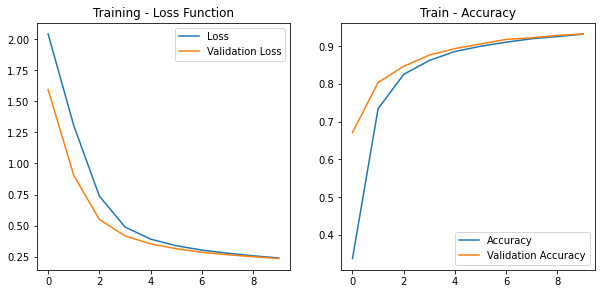

In [18]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

like we see in our plot the Loss function and The Validation Loss are decreases through the training and the accuracy of our model in detecting the true labels in Validation dataset is increasing 

-  Testing Model in x_validate data

In [30]:
predictions_one_hot = cnn_model.predict([x_validate])
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)



Text(0.5, 0, '1')

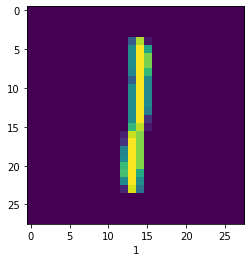

In [31]:
predicted_label = predictions[0]
plt.imshow(x_validate[0].reshape((image_rows, image_cols)))
plt.xlabel(predicted_label)

-   We see that our model made a correct prediction and it successfully recognized digit 1

- Let’s print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

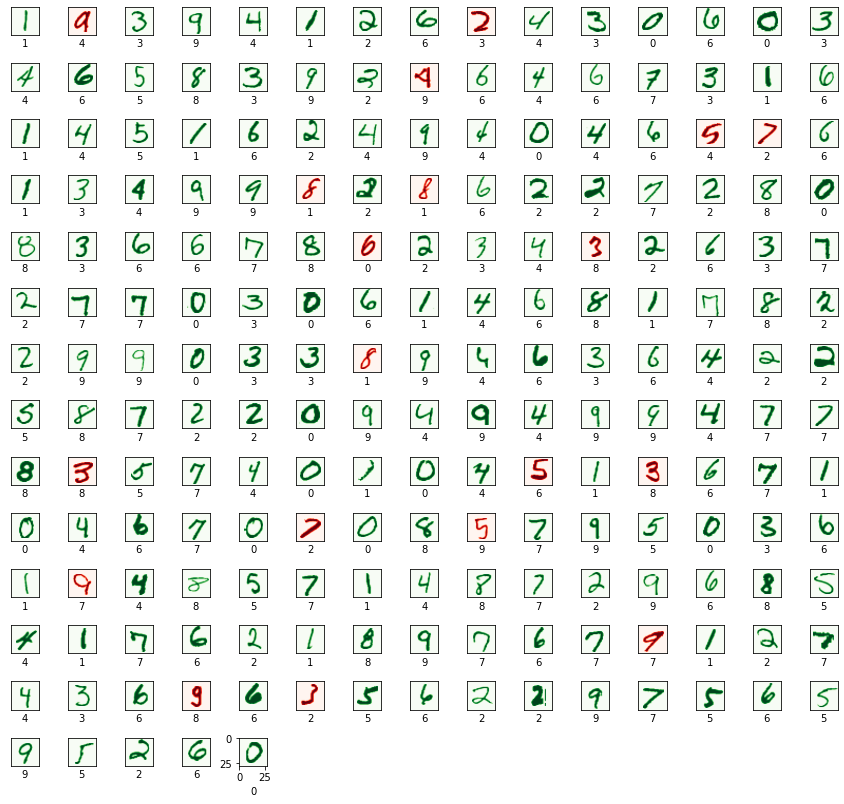

In [32]:
import math
numbers_to_display = 200
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))
for plot_index in range(numbers_to_display): 
     predicted_label = predictions[plot_index]
     plt.xticks([])
     plt.yticks([])
     plt.grid(False)
     color_map = 'Greens' if predicted_label == y_validate[plot_index] else 'Reds'
     plt.subplot(num_cells, num_cells, plot_index + 1)
     plt.imshow(x_validate[plot_index].reshape((image_rows, image_cols)), cmap=color_map)
     plt.xlabel(predicted_label)
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

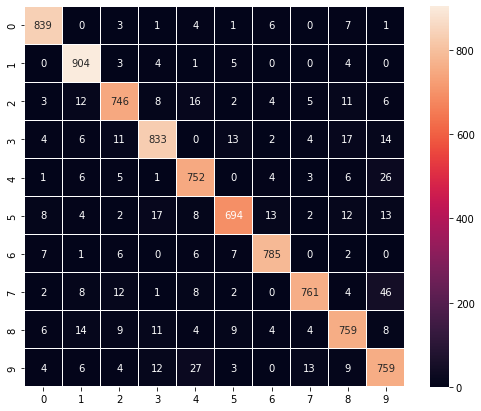

In [33]:
from sklearn import metrics
import seaborn as sn
confusion_matrix = metrics.confusion_matrix(y_validate, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<h3> Predicting labels for Test Data </h3>

In [34]:
predictions_one_hot = cnn_model.predict([x_test])
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

- checking some images with their labels predicted

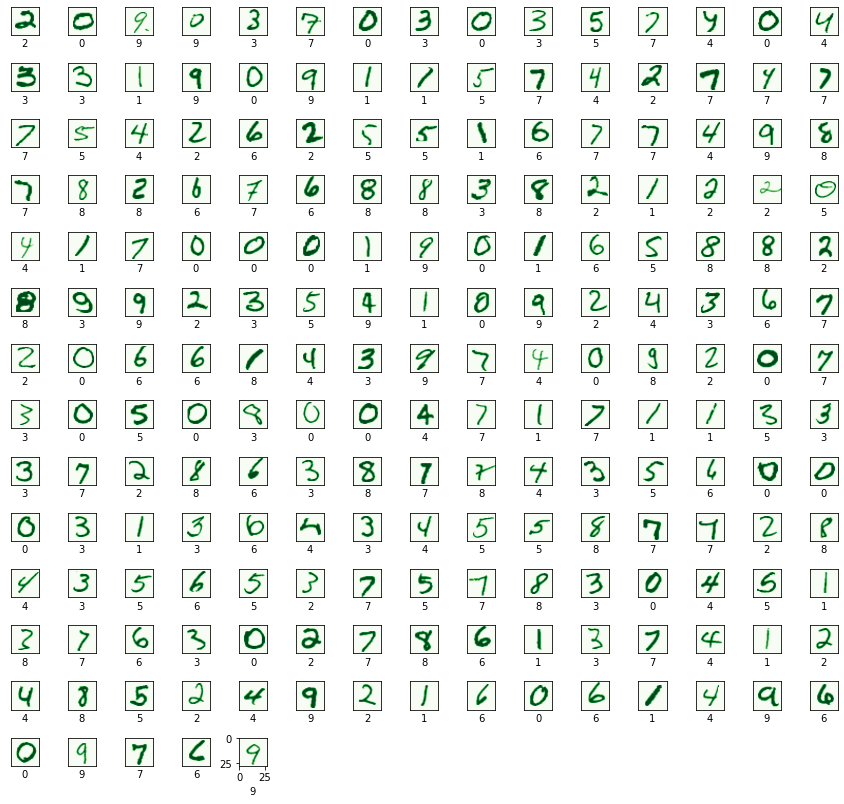

In [35]:
numbers_to_display = 200
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))
for plot_index in range(numbers_to_display): 
     predicted_label = predictions[plot_index]
     plt.xticks([])
     plt.yticks([])
     plt.grid(False)
     plt.subplot(num_cells, num_cells, plot_index + 1)
     plt.imshow(x_test[plot_index].reshape((image_rows, image_cols)), cmap=color_map)
     plt.xlabel(predicted_label)
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

In [27]:

test_df["label"]=predictions
test_df=test_df.drop("Labels Predicted", axis='columns')
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [36]:
submission = pd.DataFrame({'ImageId': range(1, len(predictions)+1), 'Label': predictions})
submission.to_csv('C:\\Users\\aitma\\Desktop\\submission.csv', index=False)

<h5> Fin et Merci pour étre là </h5>